In [1]:
import nibabel as nib
import numpy as np
from sklearn import preprocessing

def preprocess_fmri(fmri_file):
    # Load the 4D fMRI image
    img = nib.load(fmri_file)
    
    # Extract data array
    data = img.get_fdata()
    
    # Remove any non-brain tissues or structures (optional)
    # You may need additional libraries or methods for brain extraction
    
    # Normalize the data
    # You can use different normalization methods based on your data characteristics
    normalized_data = preprocessing.normalize(data.reshape(-1, data.shape[-1]), axis=0).reshape(data.shape)
    
    # Standardize the data
    standardized_data = preprocessing.StandardScaler().fit_transform(normalized_data.reshape(-1, data.shape[-1])).reshape(data.shape)
    
    return standardized_data

# Example usage:
img = "C:/Users/HOME/Downloads/fmri_kki/fmri_kki/fmri_X_1018959_session_1_run1.nii"
preprocessed_data = preprocess_fmri(img)


In [2]:
preprocessed_data

array([[[[-0.92794478, -0.93150386, -0.93181158, ..., -0.93252898,
          -0.93214971, -0.93611954],
         [-0.92925977, -0.93170762, -0.93173262, ..., -0.93278909,
          -0.93241298, -0.93496566],
         [-0.93054554, -0.93285943, -0.93196754, ..., -0.9358841 ,
          -0.93608898, -0.93521782],
         ...,
         [-0.9274028 , -0.92964283, -0.93070127, ..., -0.93716543,
          -0.93800895, -0.93722521],
         [-0.93002007, -0.92647139, -0.93195693, ..., -0.93461141,
          -0.93505534, -0.93439643],
         [-0.92885988, -0.93009763, -0.93370877, ..., -0.93648396,
          -0.93502927, -0.93528532]],

        [[-0.92730211, -0.92622307, -0.92930952, ..., -0.9359544 ,
          -0.9333629 , -0.93241939],
         [-0.92735152, -0.92742746, -0.92799798, ..., -0.93491849,
          -0.93370941, -0.93211956],
         [-0.92803139, -0.9300766 , -0.92907572, ..., -0.93411975,
          -0.93609912, -0.93526327],
         ...,
         [-0.9291165 , -0.92874871

In [4]:
from nilearn import image
from nilearn import plotting

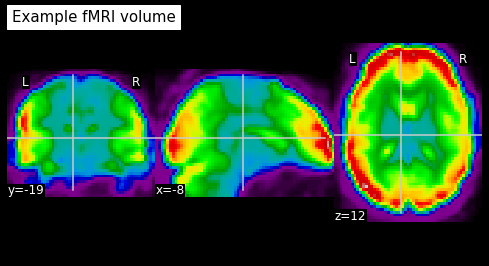

In [5]:
# Motion correction
img_corrected = image.smooth_img(img, fwhm=6)

# Visual inspection
plotting.plot_epi(img_corrected.slicer[:, :, :, 0], title='Example fMRI volume')

# Brain extraction
brain_mask_img = image.math_img("img > 1000", img=img_corrected)

# Compute mean image
mean_img = image.mean_img(img_corrected)

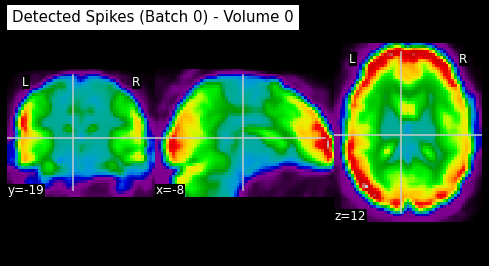

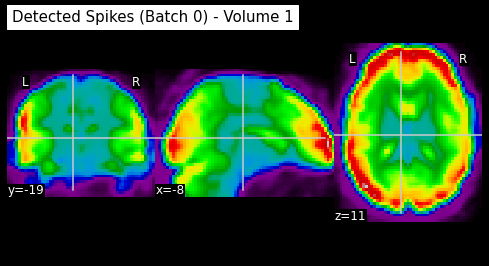

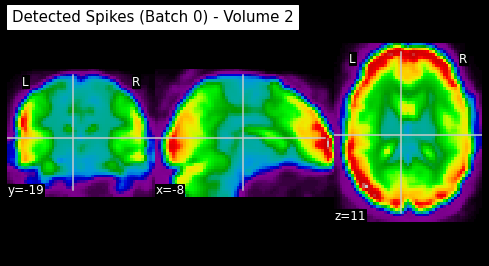

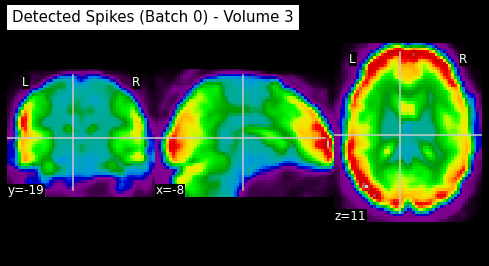

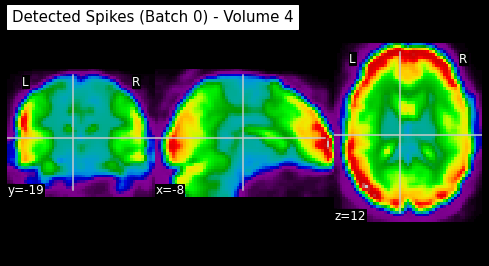

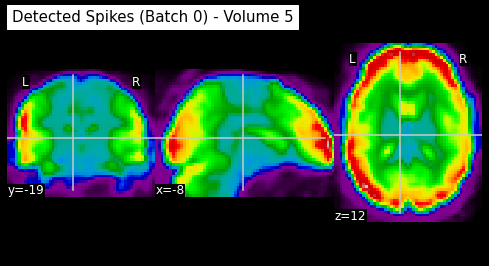

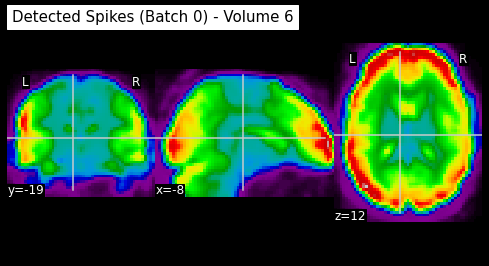

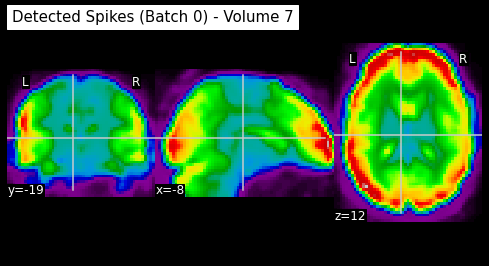

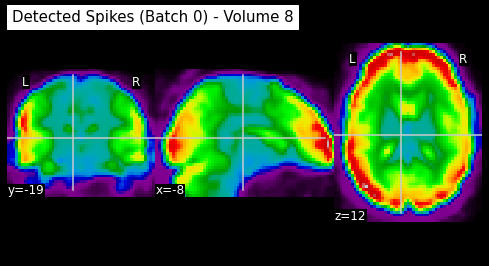

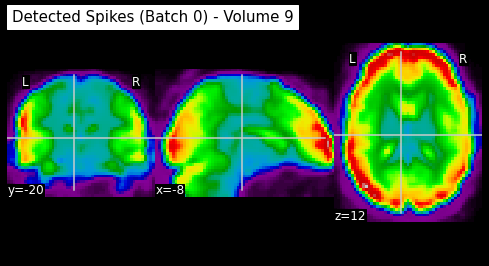

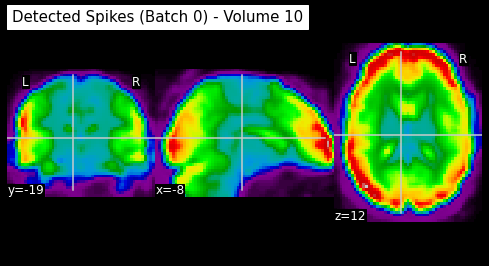

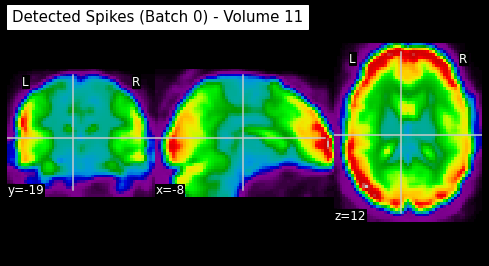

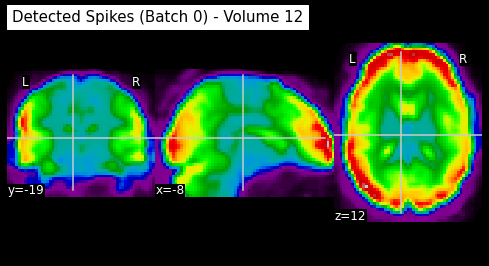

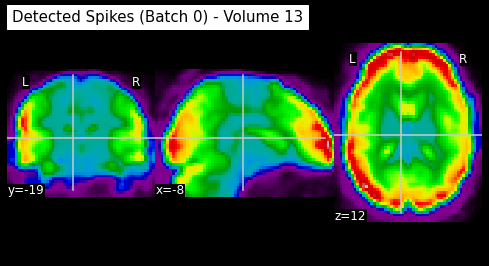

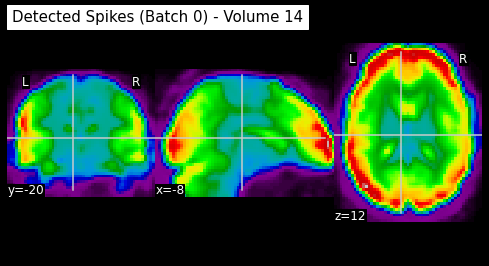

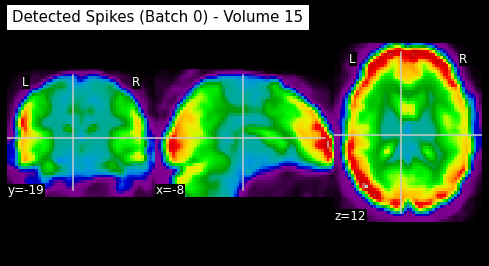

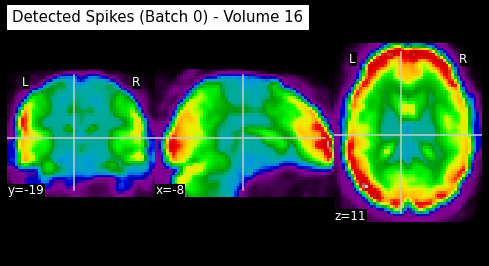

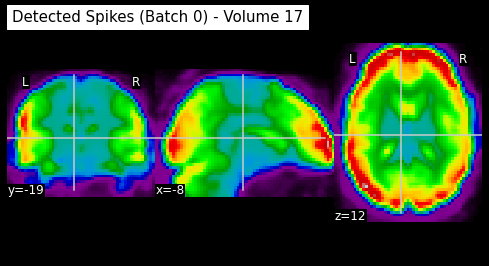

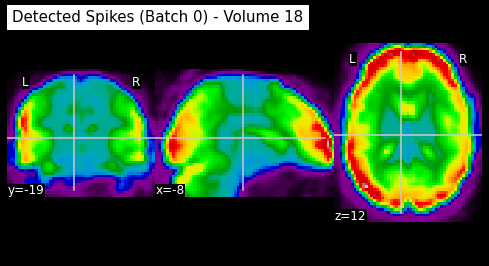

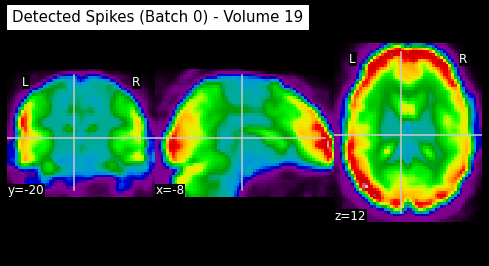

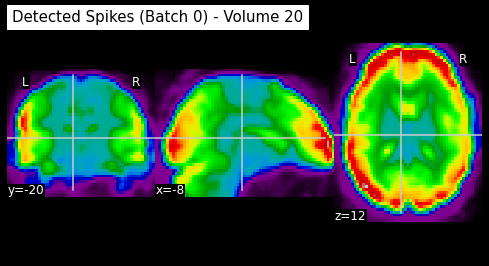

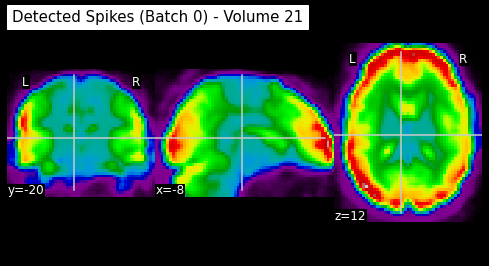

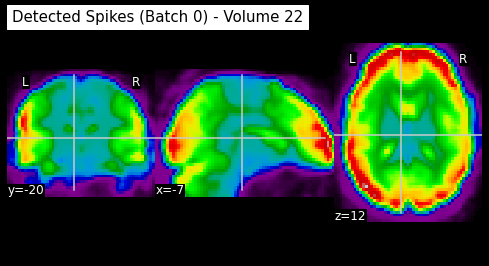

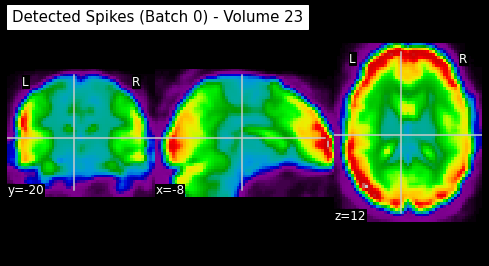

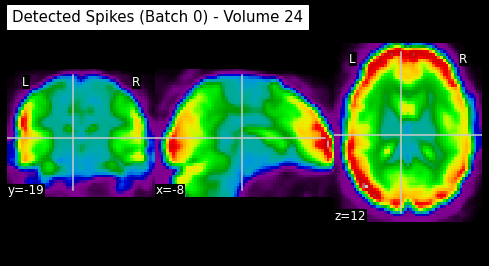

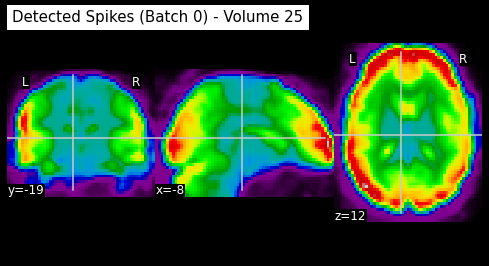

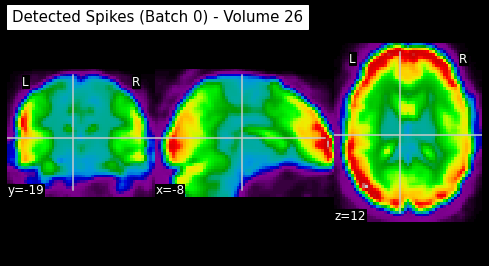

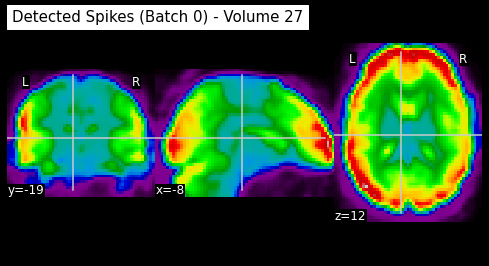

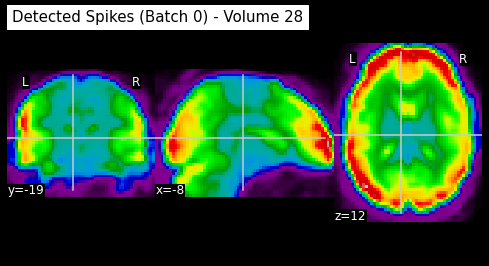

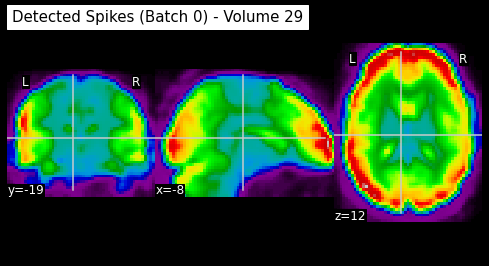

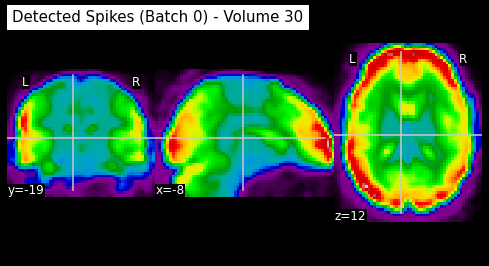

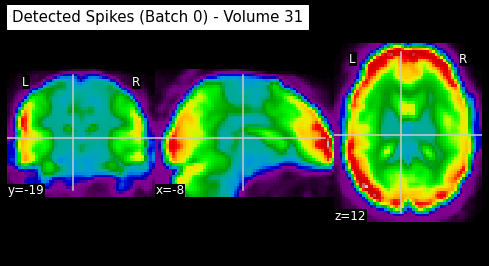

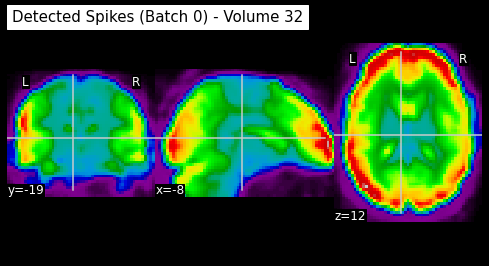

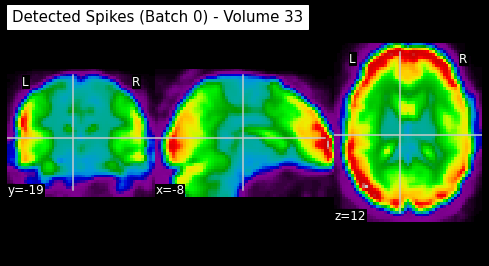

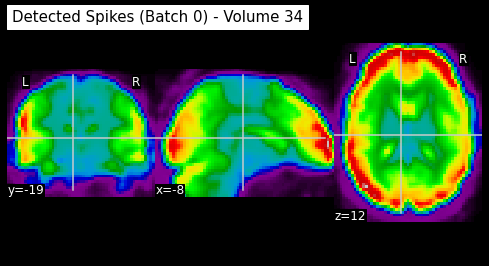

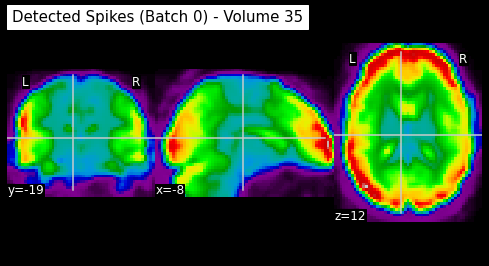

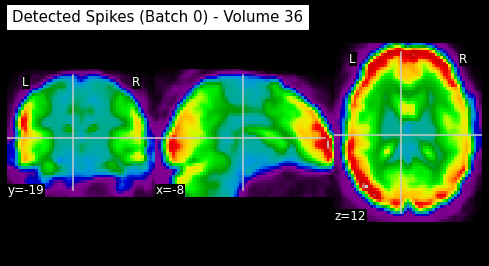

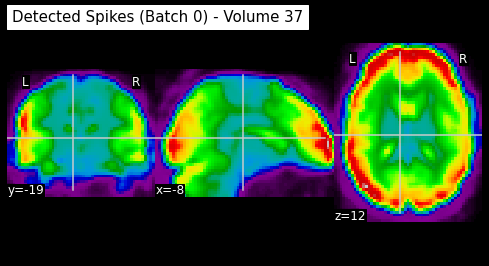

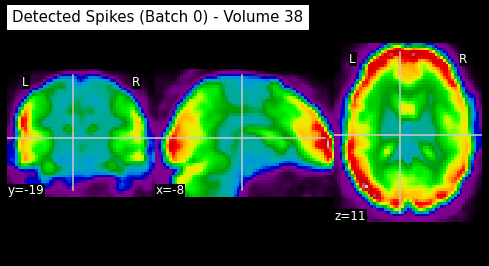

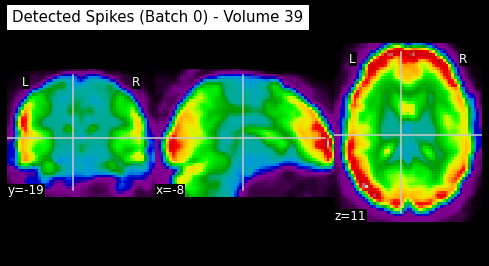

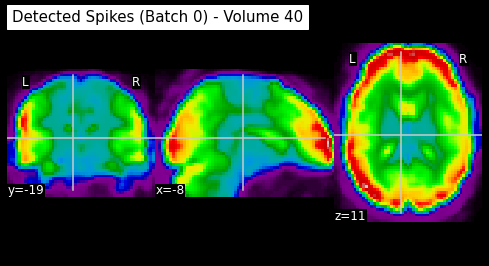

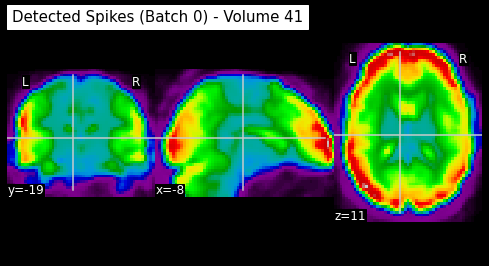

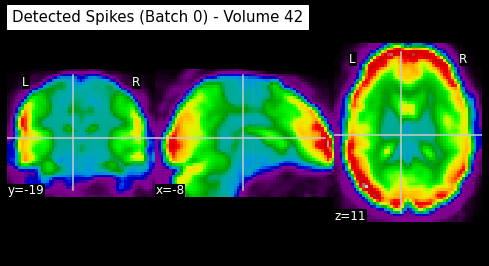

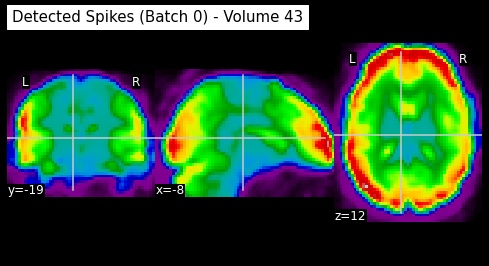

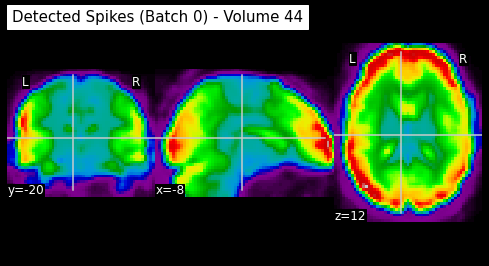

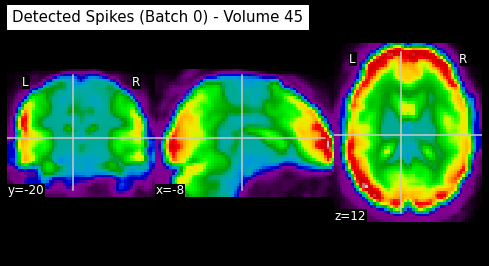

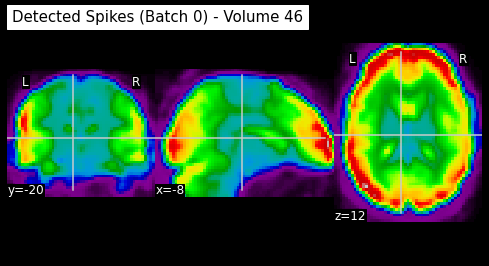

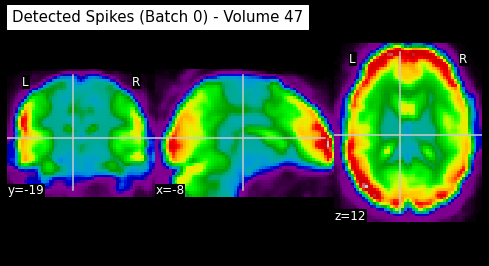

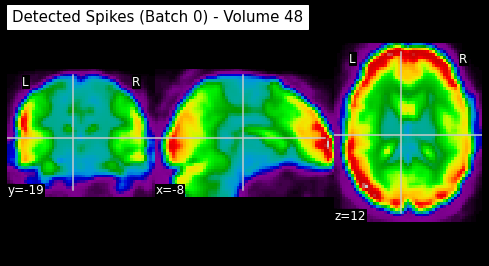

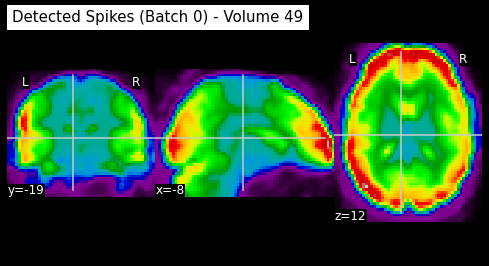

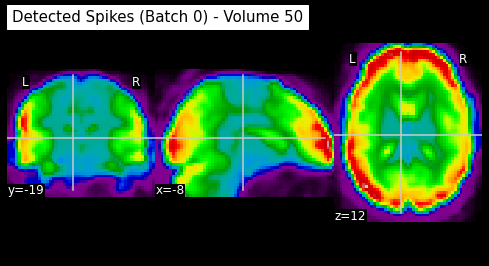

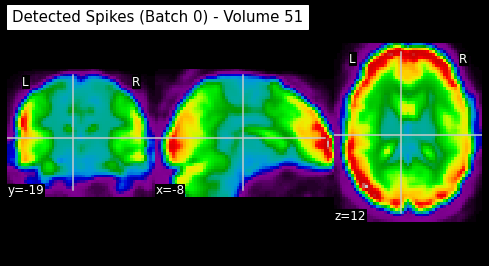

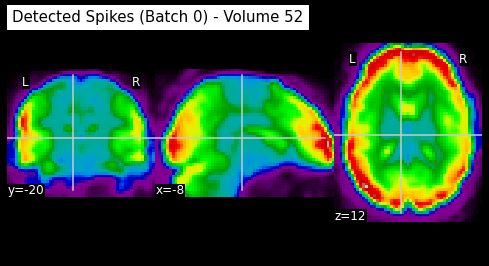

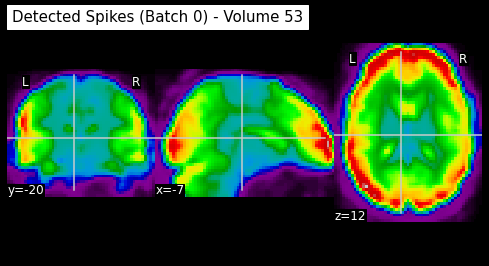

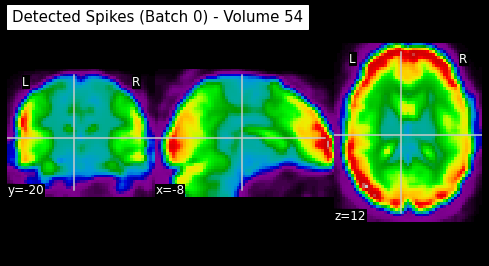

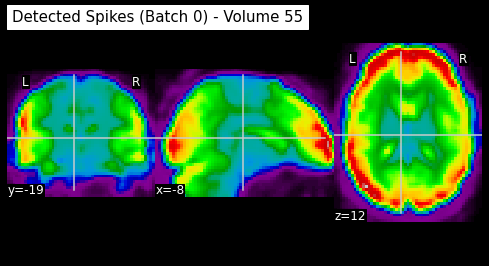

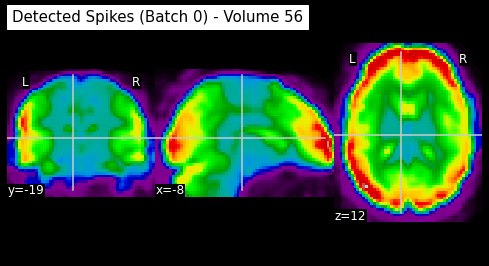

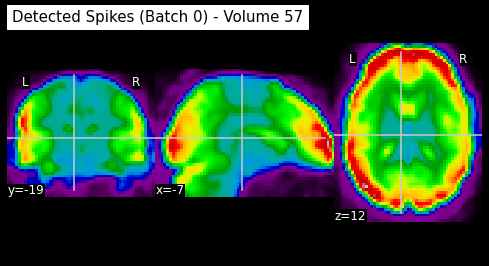

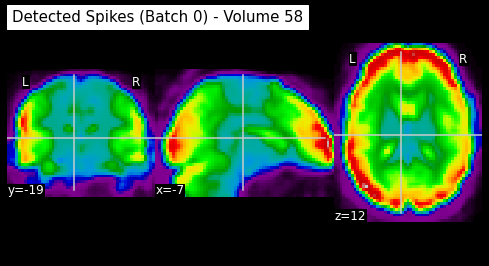

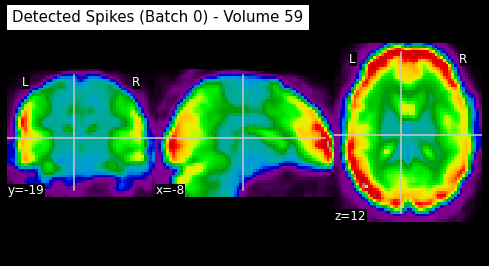

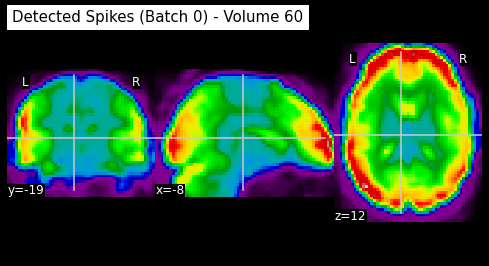

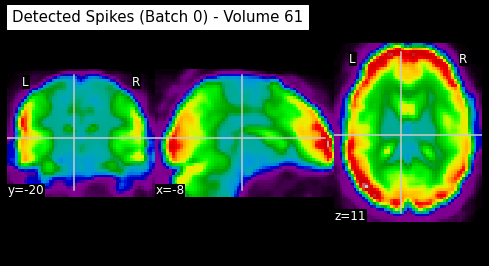

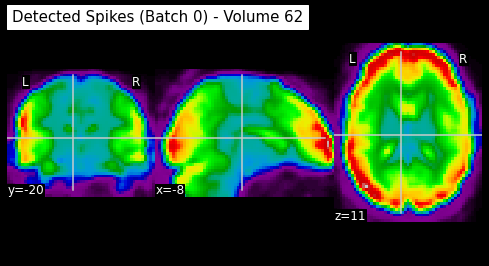

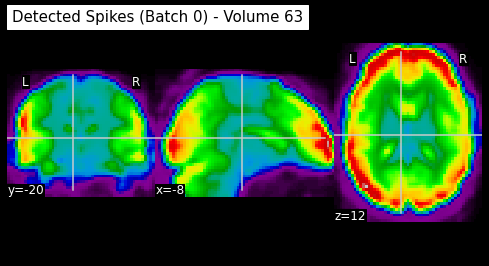

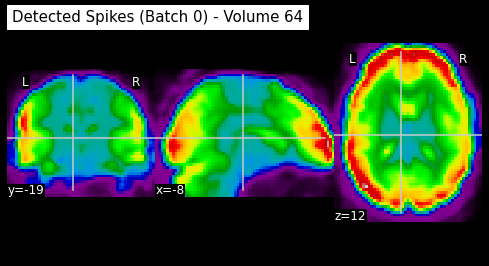

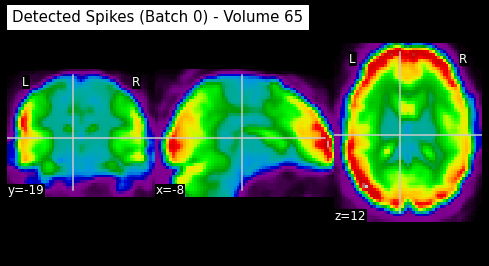

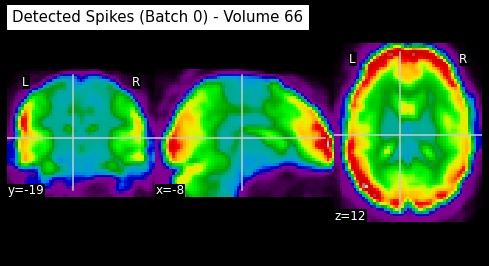

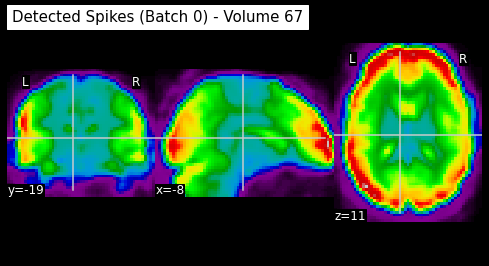

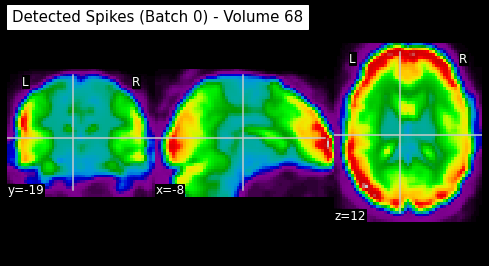

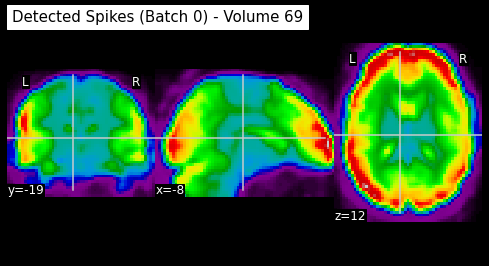

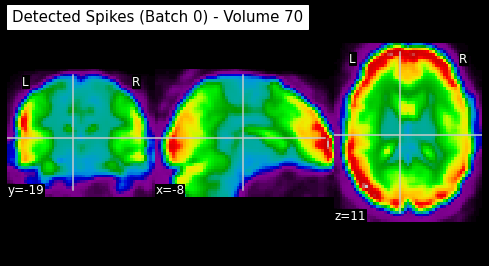

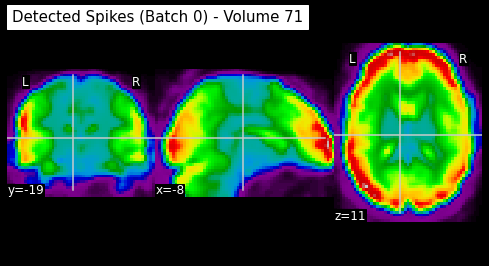

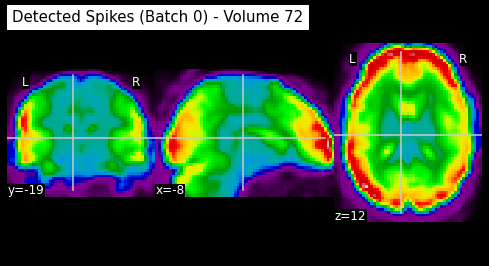

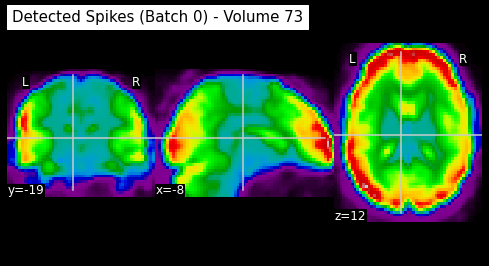

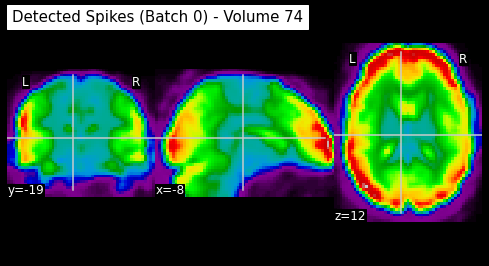

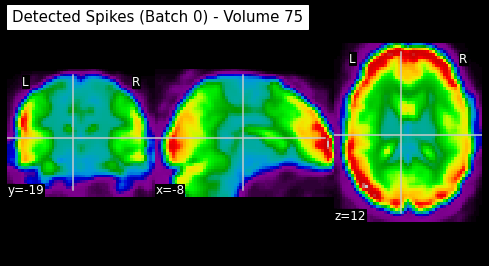

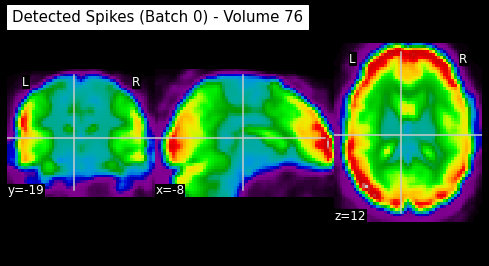

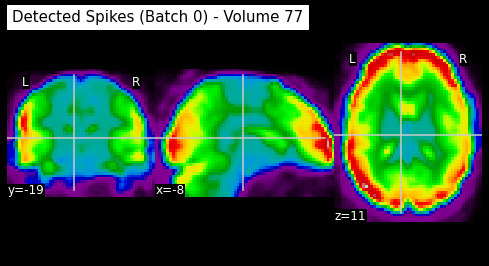

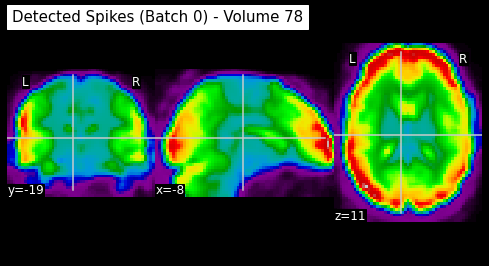

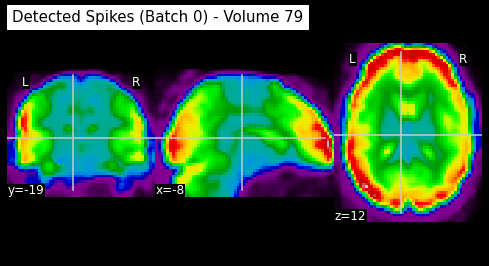

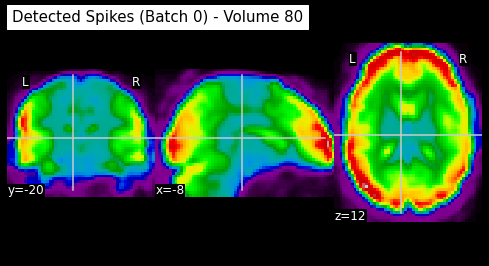

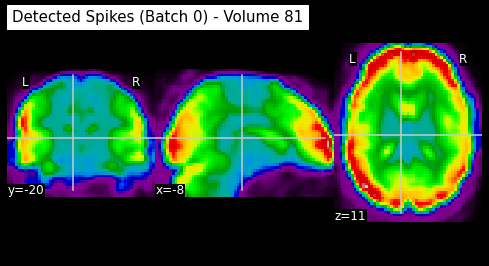

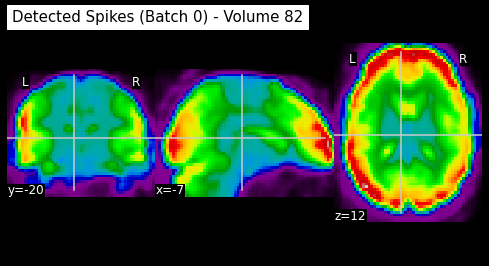

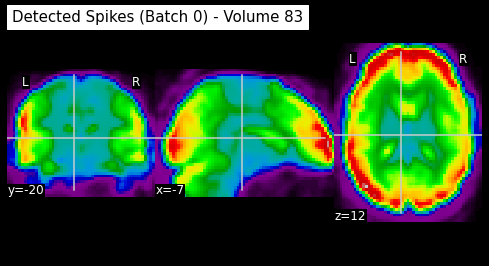

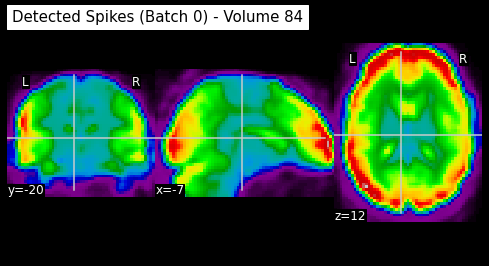

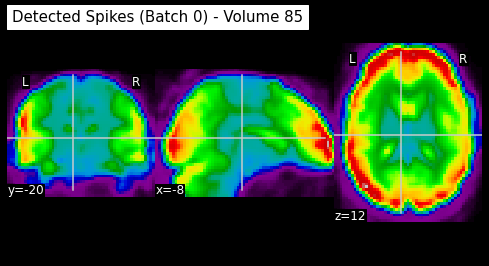

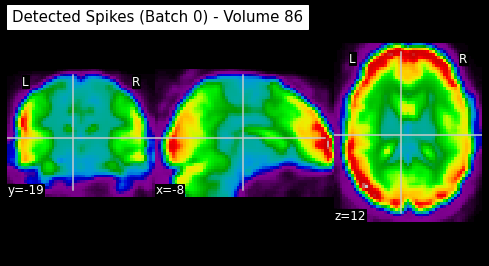

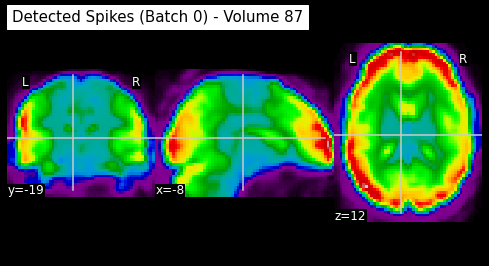

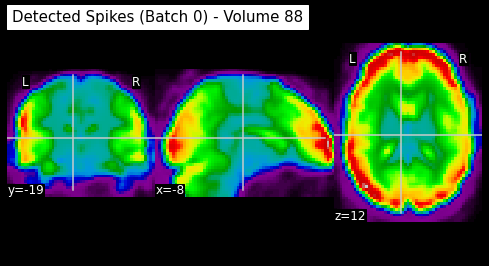

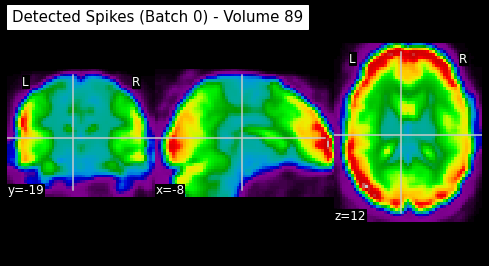

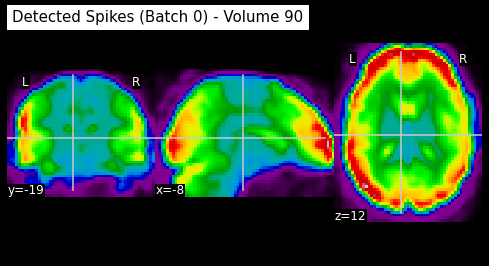

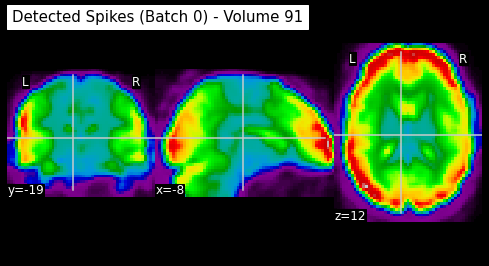

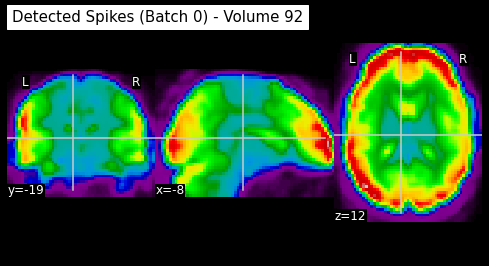

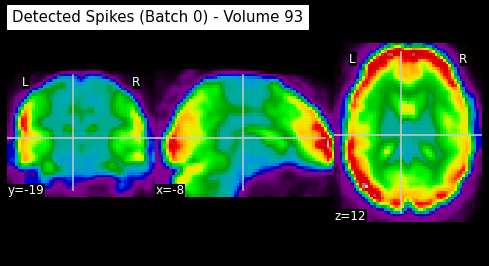

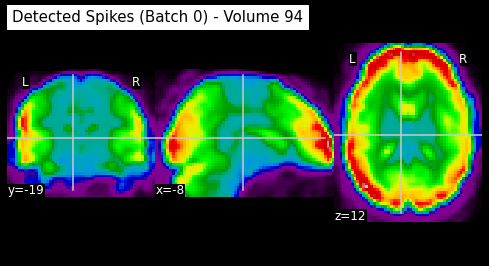

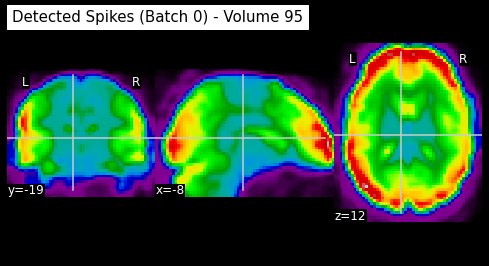

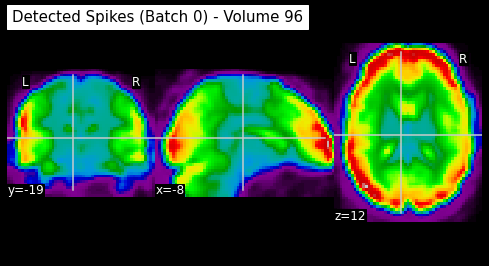

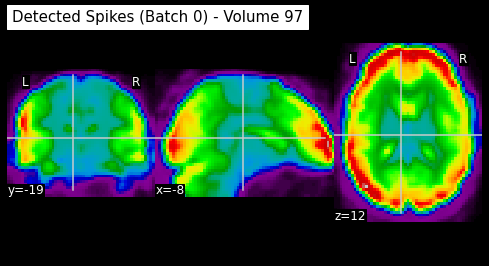

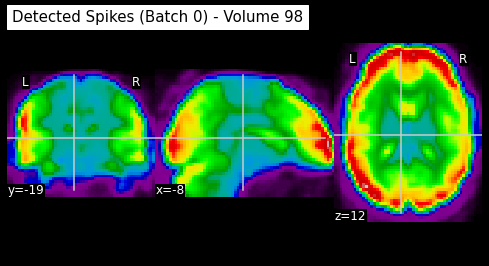

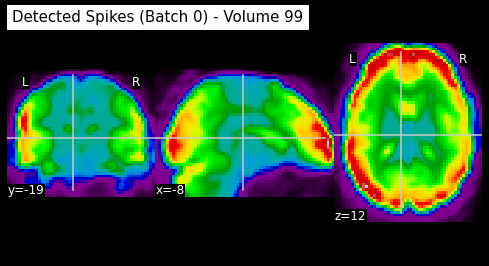

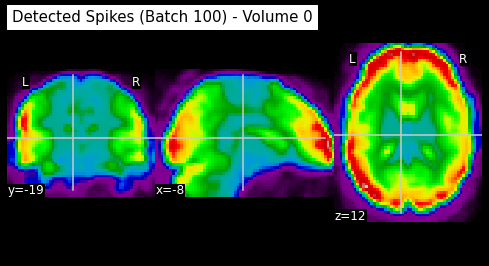

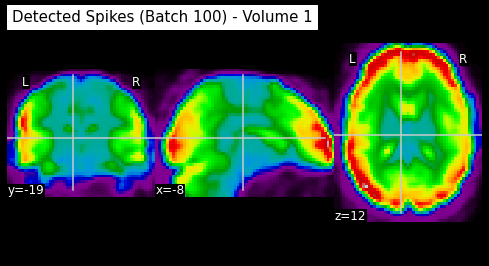

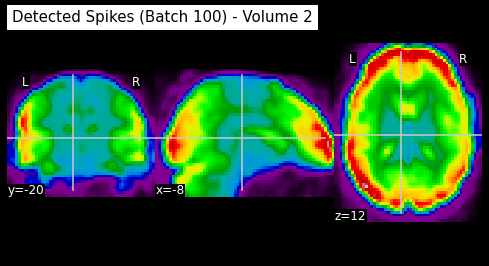

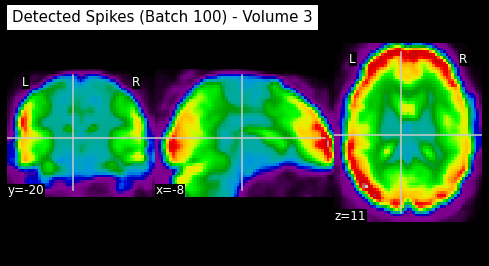

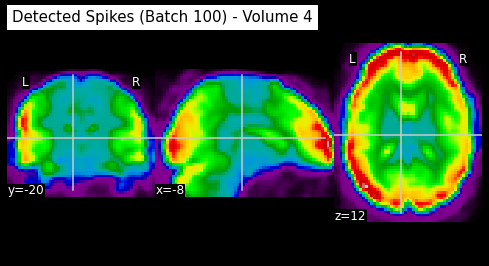

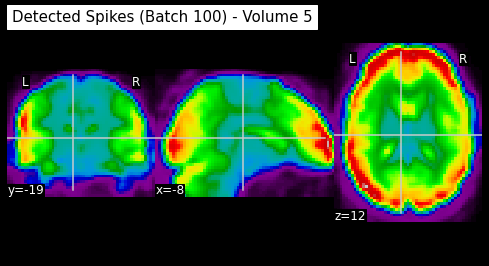

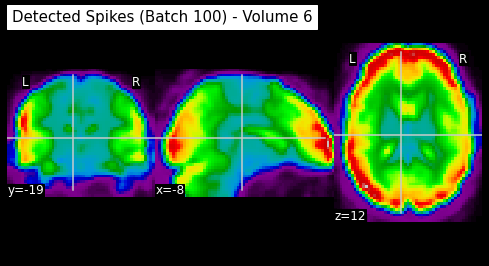

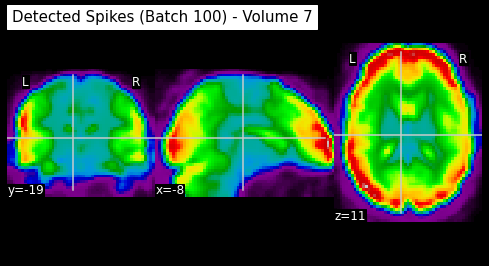

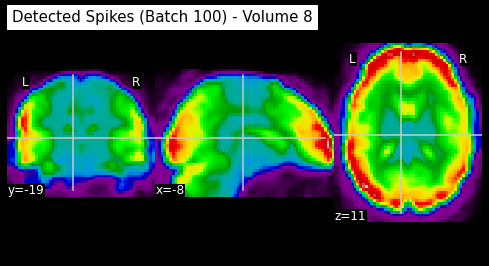

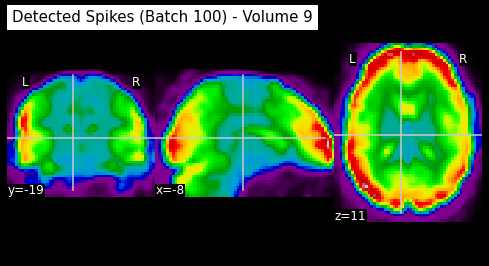

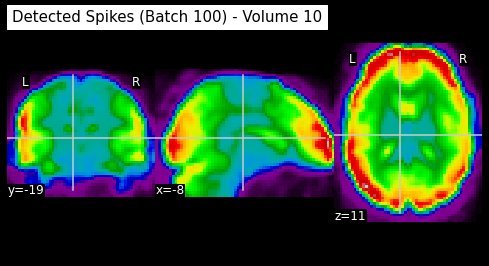

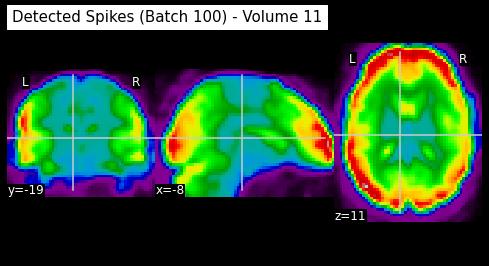

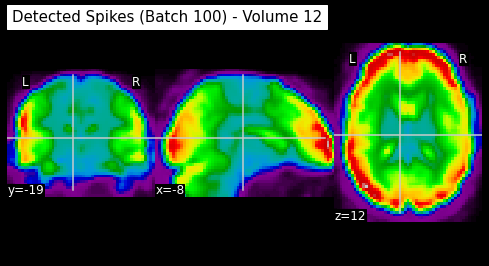

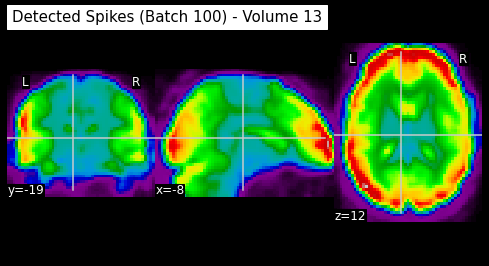

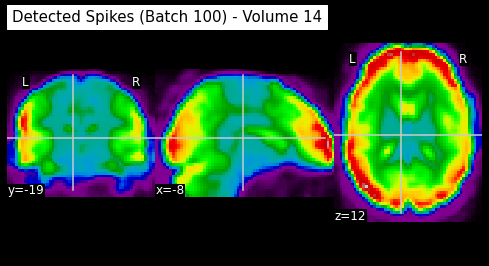

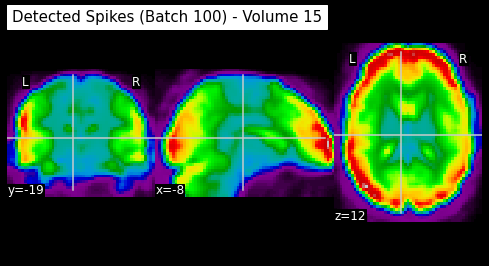

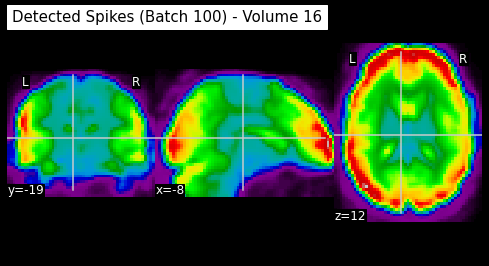

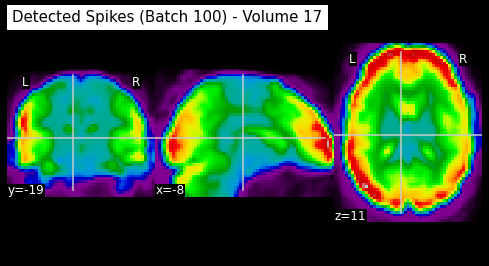

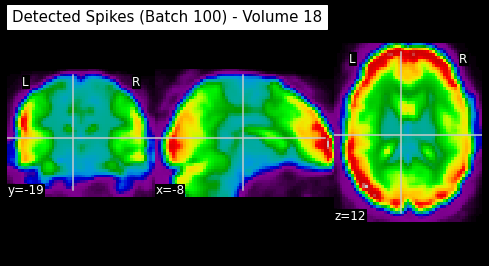

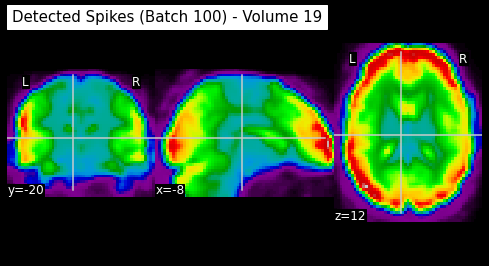

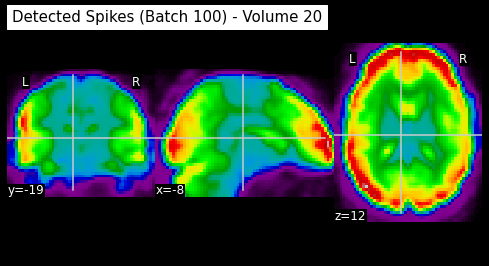

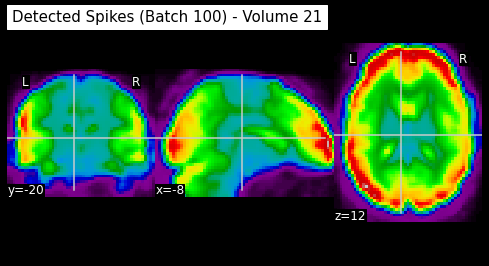

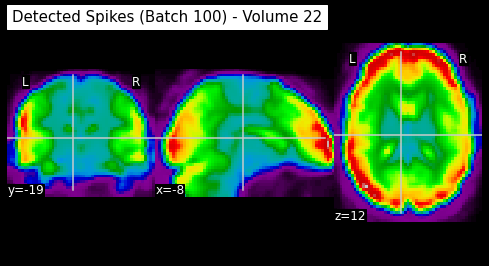

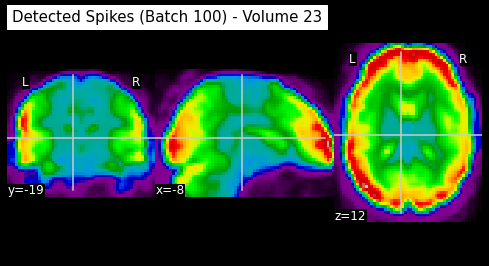

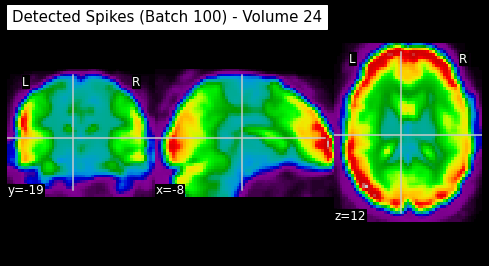

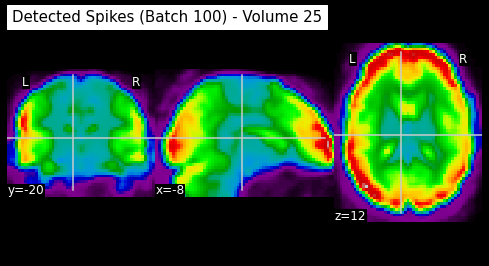

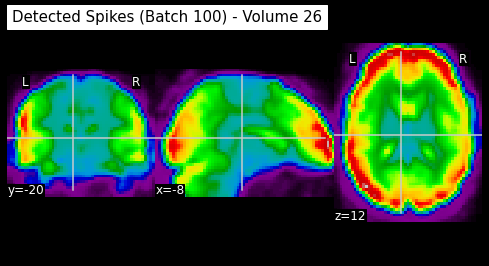

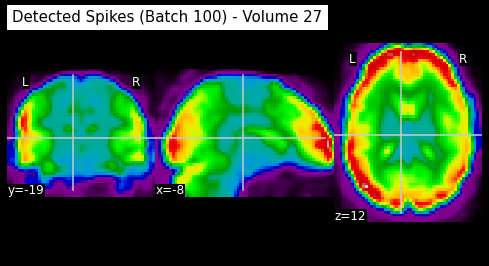

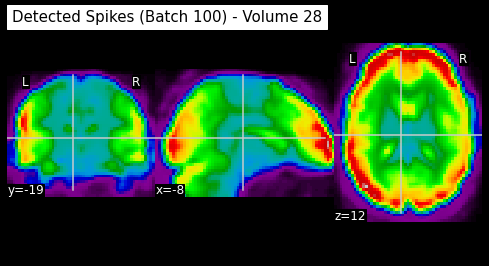

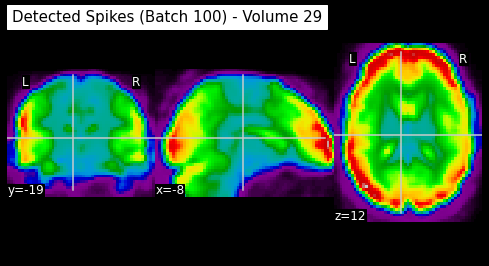

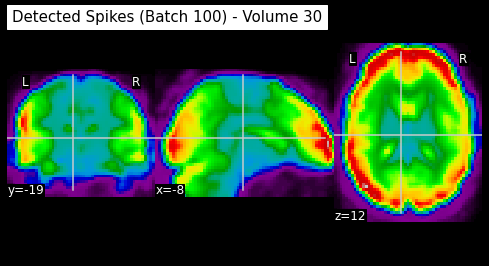

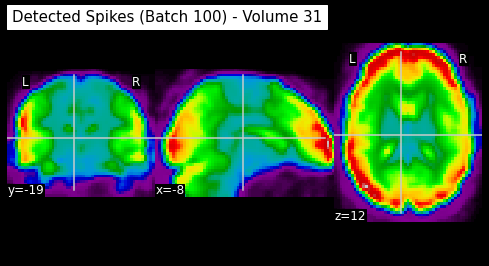

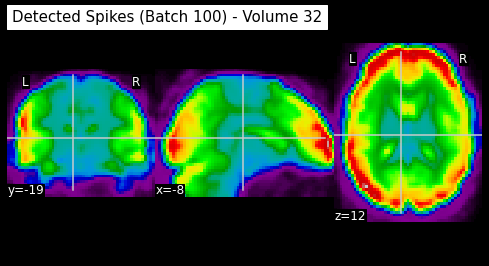

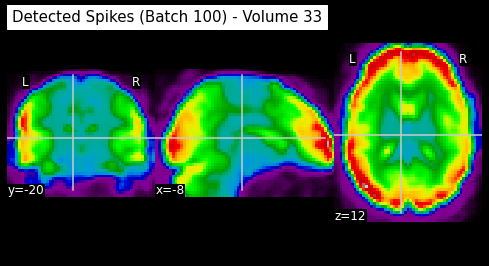

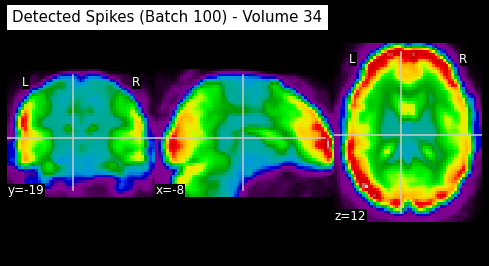

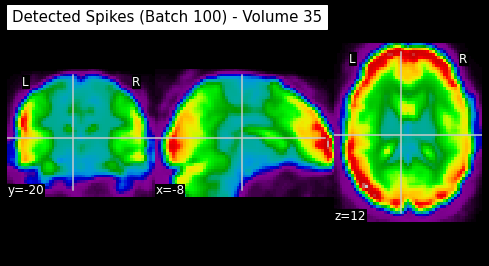

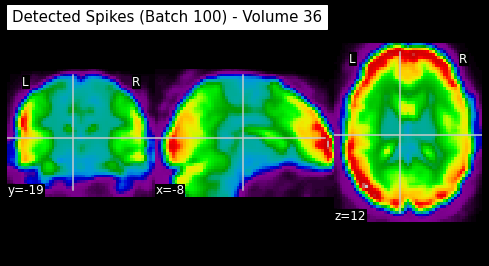

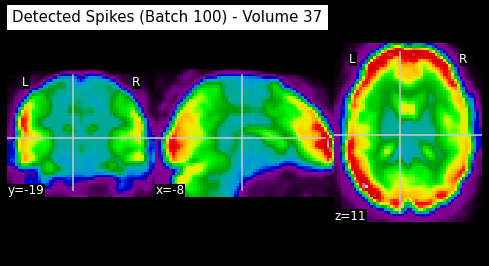

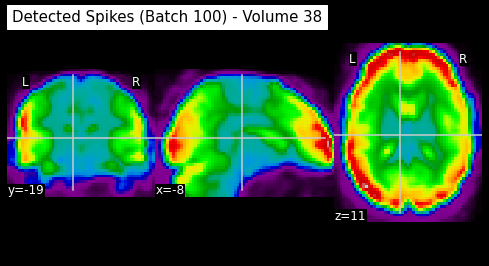

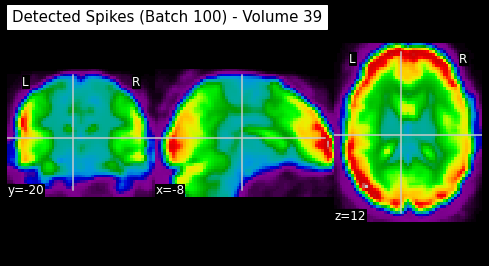

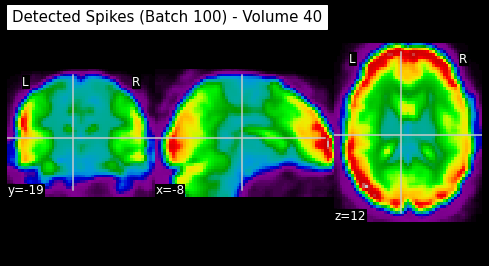

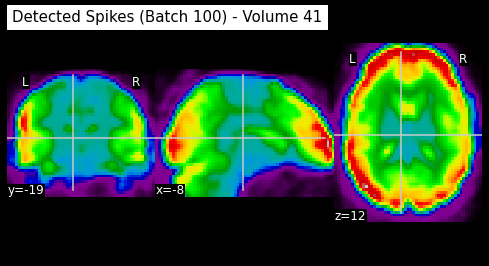

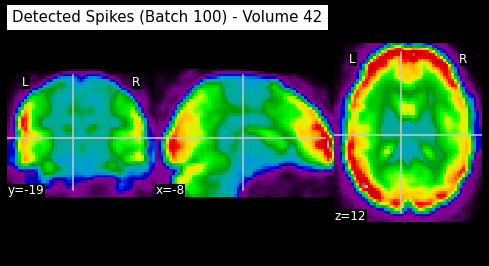

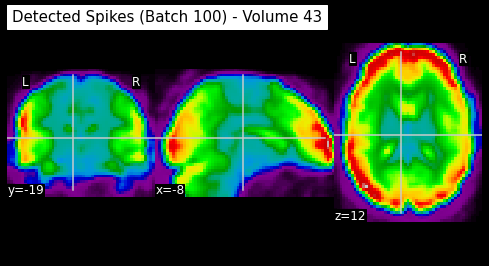

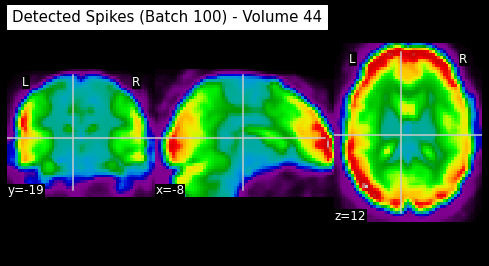

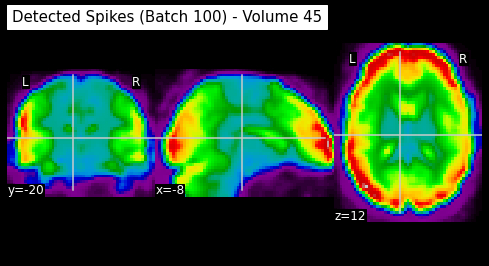

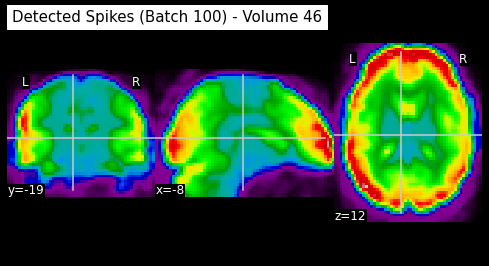

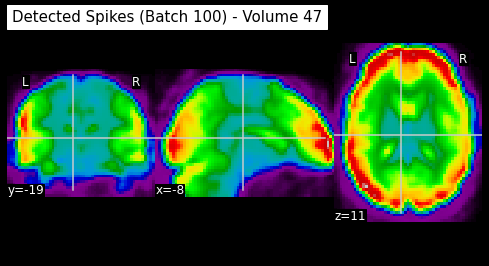

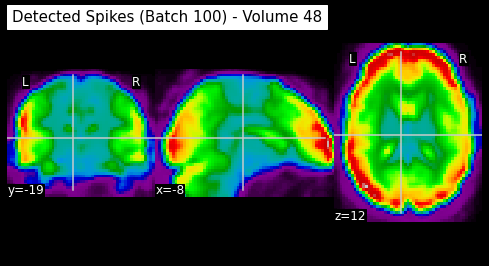

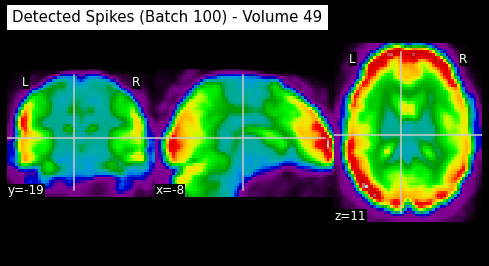

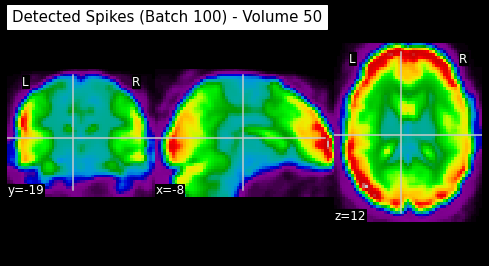

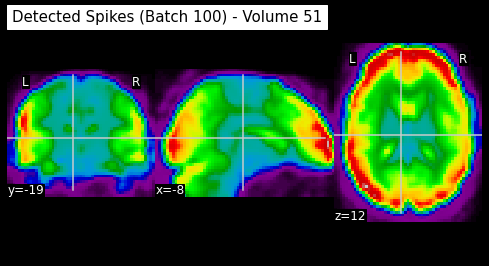

In [7]:
# Define the batch size
batch_size = 100

# Process data in batches
for i in range(0, img_corrected.shape[-1], batch_size):
    subset_data = img_corrected.slicer[:, :, :, i:i+batch_size]

    # Intensity normalization
    data = subset_data.get_fdata()
    data_normalized = (data - np.mean(data)) / np.std(data)

    # Artifact detection (example: spike detection)
    spike_threshold = 100  # Adjust threshold based on your data
    spikes = np.where(data > spike_threshold)

    for volume_index in range(subset_data.shape[-1]):  # Iterate over volumes in the batch
        volume_to_visualize = subset_data.slicer[:, :, :, volume_index]

        # Visual inspection of detected spikes for the current volume
        plotting.plot_epi(volume_to_visualize, title=f'Detected Spikes (Batch {i}) - Volume {volume_index}')